# Pandas + duckdb

## load sakila sqlite -> duckdb

In [1]:
import duckdb

with open("sql/load_sakila.sql", "r") as sql_file:
    loading_script = sql_file.read()

loading_script

"INSTALL sqlite;\n\nLOAD sqlite;\n\nCALL sqlite_attach ('data/sqlite-sakila.db');"

## connect to duckdb

In [2]:
from pathlib import Path

duckdb_path = "data/sakila.duckdb"

# throws away sakila.duckdb if it exists, makes it idempotent 
Path(duckdb_path).unlink(missing_ok=True)

with duckdb.connect(duckdb_path) as conn:
    conn.sql(loading_script)

    description = conn.sql("desc;").df()
    films = conn.sql("FROM film;").df()

description

,database,schema,name,column_names,column_types,temporary
0,sakila,main,actor,"[actor_id, first_name, last_name, last_update]","[DOUBLE, VARCHAR, VARCHAR, TIMESTAMP]",False
1,sakila,main,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, VA...",False
2,sakila,main,category,"[category_id, name, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False
3,sakila,main,city,"[city_id, city, country_id, last_update]","[BIGINT, VARCHAR, BIGINT, TIMESTAMP]",False
4,sakila,main,country,"[country_id, country, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False
5,sakila,main,customer,"[customer_id, store_id, first_name, last_name,...","[BIGINT, BIGINT, VARCHAR, VARCHAR, VARCHAR, BI...",False
6,sakila,main,customer_list,"[ID, name, address, zip_code, phone, city, cou...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, VARCHAR, V...",False
7,sakila,main,film,"[film_id, title, description, release_year, la...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, BI...",False
8,sakila,main,film_actor,"[actor_id, film_id, last_update]","[BIGINT, BIGINT, TIMESTAMP]",False
9,sakila,main,film_category,"[film_id, category_id, last_update]","[BIGINT, BIGINT, TIMESTAMP]",False


In [6]:
films.info

<bound method DataFrame.info of      film_id              title  \
0          1   ACADEMY DINOSAUR   
1          2     ACE GOLDFINGER   
2          3   ADAPTATION HOLES   
3          4   AFFAIR PREJUDICE   
4          5        AFRICAN EGG   
..       ...                ...   
995      996     YOUNG LANGUAGE   
996      997         YOUTH KICK   
997      998       ZHIVAGO CORE   
998      999  ZOOLANDER FICTION   
999     1000          ZORRO ARK   

                                           description release_year  \
0    A Epic Drama of a Feminist And a Mad Scientist...         2006   
1    A Astounding Epistle of a Database Administrat...         2006   
2    A Astounding Reflection of a Lumberjack And a ...         2006   
3    A Fanciful Documentary of a Frisbee And a Lumb...         2006   
4    A Fast-Paced Documentary of a Pastry Chef And ...         2006   
..                                                 ...          ...   
995  A Unbelieveable Yarn of a Boat And a Database

In [5]:
films.sample(10)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
291,292,EXCITEMENT EVE,A Brilliant Documentary of a Monkey And a Car ...,2006,1,<NA>,3,0.99,51,20.99,G,Commentaries,2021-03-06 15:52:03
540,541,LUKE MUMMY,A Taut Character Study of a Boy And a Robot wh...,2006,1,<NA>,5,2.99,74,21.99,NC-17,"Trailers,Behind the Scenes",2021-03-06 15:52:05
10,11,ALAMO VIDEOTAPE,A Boring Epistle of a Butler And a Cat who mus...,2006,1,<NA>,6,0.99,126,16.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00
15,16,ALLEY EVOLUTION,A Fast-Paced Drama of a Robot And a Composer w...,2006,1,<NA>,6,2.99,180,23.99,NC-17,"Trailers,Commentaries",2021-03-06 15:52:00
106,107,BUNCH MINDS,A Emotional Story of a Feminist And a Feminist...,2006,1,<NA>,4,2.99,63,13.99,G,Behind the Scenes,2021-03-06 15:52:01
912,913,TROOPERS METAL,A Fanciful Drama of a Monkey And a Feminist wh...,2006,1,<NA>,3,0.99,115,20.99,R,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:08
388,389,GUNFIGHTER MUSSOLINI,A Touching Saga of a Robot And a Boy who must ...,2006,1,<NA>,3,2.99,127,9.99,PG-13,"Trailers,Commentaries",2021-03-06 15:52:03
55,56,BAREFOOT MANCHURIAN,A Intrepid Story of a Cat And a Student who mu...,2006,1,<NA>,6,2.99,129,15.99,G,"Trailers,Commentaries",2021-03-06 15:52:01
519,520,LICENSE WEEKEND,A Insightful Story of a Man And a Husband who ...,2006,1,<NA>,7,2.99,91,28.99,NC-17,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:04
955,956,WANDA CHAMBER,A Insightful Drama of a A Shark And a Pioneer ...,2006,1,<NA>,7,4.99,107,23.99,PG-13,"Commentaries,Deleted Scenes,Behind the Scenes",2021-03-06 15:52:08


In [7]:
#
duckdb.sql("from films;").df().head(2)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00


## Create a function to query Sakila

In [13]:
def query_sakila(query: str, duckdb_path = "data/sakila.duckdb"):
    with duckdb.connect(duckdb_path) as conn:
        df = conn.sql(query=query).df()

    return df

query_sakila("""
             SELECT
                actor_id::INT AS actor_id,
                first_name || ' ' || last_name AS actor 
             FROM actor
             WHERE first_name ILIKE 'J%' AND last_name ILIKE 'D%';
             """).head()

,actor_id,actor
0,4,JENNIFER DAVIS
1,35,JUDY DEAN
2,41,JODIE DEGENERES
3,123,JULIANNE DENCH


## join film related dataframes


- film
- film_actor (bridge)
- film_category (bridge)
- actor
- category
- language (join with film)


In [29]:
films_joined = query_sakila("""
    SELECT
        a.first_name || ' ' || a.last_name AS actor,
        f.title AS film_title,
        f.rating AS film_rating,
        c.name AS category,
        l.name AS language
    FROM film f
        LEFT JOIN film_actor fa ON f.film_id = fa.film_id
        LEFT JOIN actor a ON a.actor_id = fa.actor_id
        LEFT JOIN film_category fc ON f.film_id = fc.film_id
        LEFT JOIN category c ON c.category_id = fc.category_id
        LEFT JOIN language l ON l.language_id = f.language_id
    ORDER BY
        film_title
             ;
""")

films_joined.head(30)

,actor,film_title,film_rating,category,language
0,PENELOPE GUINESS,ACADEMY DINOSAUR,PG,Documentary,English
1,WARREN NOLTE,ACADEMY DINOSAUR,PG,Documentary,English
2,JOHNNY CAGE,ACADEMY DINOSAUR,PG,Documentary,English
3,OPRAH KILMER,ACADEMY DINOSAUR,PG,Documentary,English
4,MENA TEMPLE,ACADEMY DINOSAUR,PG,Documentary,English
5,ROCK DUKAKIS,ACADEMY DINOSAUR,PG,Documentary,English
6,SANDRA PECK,ACADEMY DINOSAUR,PG,Documentary,English
7,CHRISTIAN GABLE,ACADEMY DINOSAUR,PG,Documentary,English
8,LUCILLE TRACY,ACADEMY DINOSAUR,PG,Documentary,English
9,MARY KEITEL,ACADEMY DINOSAUR,PG,Documentary,English


## how many actors are there in each film

In [40]:
total_actors = query_sakila("""
    SELECT
    film_title,
    COUNT(DISTINCT actor) AS actor_count
FROM films_joined
GROUP BY film_title
ORDER BY actor_count DESC;

""")

total_actors.head(10)

,film_title,actor_count
0,LAMBS CINCINATTI,15
1,DRACULA CRYSTAL,13
2,CRAZY HOME,13
3,RANDOM GO,13
4,MUMMY CREATURES,13
5,BOONDOCK BALLROOM,13
6,CHITTY LOCK,13
7,TITANIC BOONDOCK,12
8,SKY MIRACLE,12
9,LESSON CLEOPATRA,12


In [37]:
films_joined.groupby("film_title")["actor"].nunique().sort_values(ascending=False).reset_index().head(10)

,film_title,actor
0,LAMBS CINCINATTI,15
1,DRACULA CRYSTAL,13
2,CRAZY HOME,13
3,BOONDOCK BALLROOM,13
4,CHITTY LOCK,13
5,RANDOM GO,13
6,MUMMY CREATURES,13
7,HELLFIGHTERS SIERRA,12
8,TITANIC BOONDOCK,12
9,LONELY ELEPHANT,12


In [38]:
# with duckdb.sql we can directly query a dataframe
# don't need to connect to an existing database file
duckdb.sql("SELECT film_title, film_rating FROM films_joined").df().head()


,film_title,film_rating
0,ACADEMY DINOSAUR,PG
1,ACADEMY DINOSAUR,PG
2,ACADEMY DINOSAUR,PG
3,ACADEMY DINOSAUR,PG
4,ACADEMY DINOSAUR,PG


## visualization

In [47]:
total_actors.head(5)

,film_title,actor_count
0,LAMBS CINCINATTI,15
1,DRACULA CRYSTAL,13
2,CRAZY HOME,13
3,RANDOM GO,13
4,MUMMY CREATURES,13


matplotlib.axes._axes.Axes

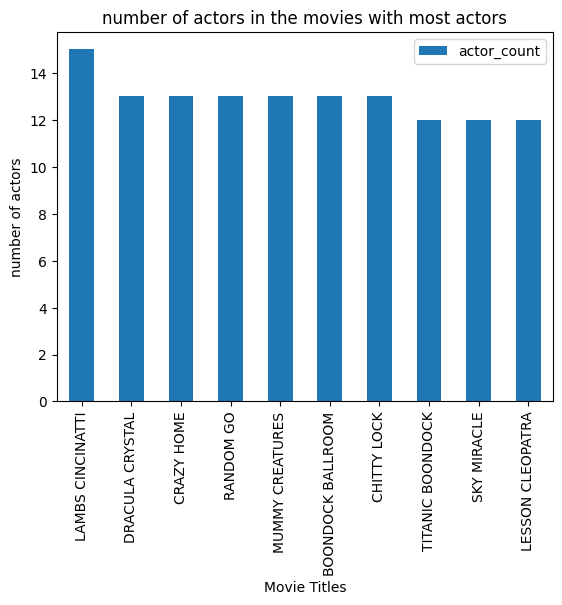

In [ ]:
ax = total_actors.head(10).plot(
    x = "film_title", 
    y = "actor_count", 
    kind="bar", 
    xlabel = "Movie Titles", 
    ylabel = "number of actors", 
    title = "number of actors in the movies with most actors"

)

# instance of an Axes class
type(ax)

In [51]:
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("actor_count_bar.png", dpi=150)


In [57]:
df = total_actors.head(10)
df

,film_title,actor_count
0,LAMBS CINCINATTI,15
1,DRACULA CRYSTAL,13
2,CRAZY HOME,13
3,RANDOM GO,13
4,MUMMY CREATURES,13
5,BOONDOCK BALLROOM,13
6,CHITTY LOCK,13
7,TITANIC BOONDOCK,12
8,SKY MIRACLE,12
9,LESSON CLEOPATRA,12


## draw directly in matplotlib

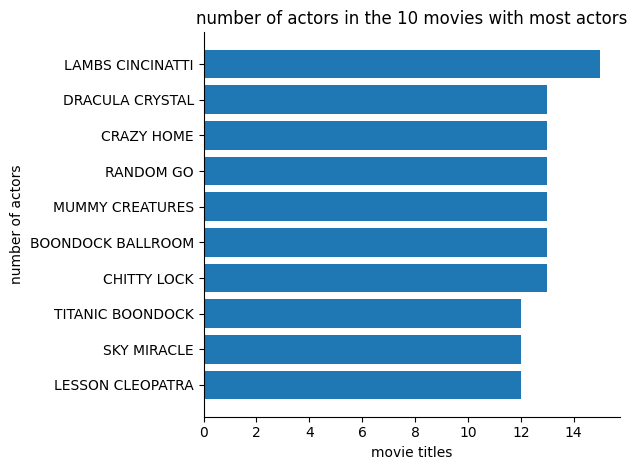

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
ax.barh(y=df["film_title"], width=df["actor_count"])
ax.invert_yaxis()
ax.set(
    xlabel="movie titles",
    ylabel="number of actors",
    title="number of actors in the 10 movies with most actors",
)

ax.spines[['right', 'top']].set_visible(False)

fig.tight_layout()
fig.savefig("actor_count_hbar_png", dpi=150)